# Using Dropout to fight overfitting

**Goal:** In this notebook you will learn how you can use dropout layers as a very easy way to fight overfitting. You will download the cifar10 dataset which contains quite small images (32x32x3) of 10 classes. The data is from the Canadian Institute For Advanced Research. You will plot examples of the images with the class label below. Note that because the images are so small it's not always very easy to recoginse which of the ten classes is on the iamge, even as a human. After loading the dataset you will train two Convolutional neural networks to predict the the test dataset.   
The first Convolutional neural network will have no dropout layers.  
The second neural network will use dropout layers in the fully connected part of the network.

Finall, you will see that dropout during training is a very easy way to prevent overfitting and even to improve the accuracy!

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it.

**Dataset:** You work with the Cifar10 dataset. You have 60'000 32x32 pixel color images of 10 classes ("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

**Content:**
* Load the Cifar10 dataset
* Plot a random example of each class label
* Normalize the data to be in the range from -1 and 1
* Define and fit a Convolutional neural network without any dropout layers
* Define and fit a Convolutional neural network with dropout layers in the fully connected part
* Compare the loss and accuracy curves of the two models

| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_02.ipynb)


#### Imports


In [2]:
# load required libraries:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from keras.utils import to_categorical


### Load, plot and normalize the data

In the next cell you will load the Cifar10 dataset, 50'000 images are in the training set and 10'000 are in the test dataset.
You will plot one random example of each label, as you can see the images are really small. After the ploting you normalize the images which are in the range from 0 to 255 to be in the range of -1 to 1. Finally you can convert the lables into the one hot encoding.

170498071/170498071 [==============================] - 3s 0us/step


<ipython-input-3-d77433998a7e>:12: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(labels[i]+" "+np.str(y_train[rmd][0]))


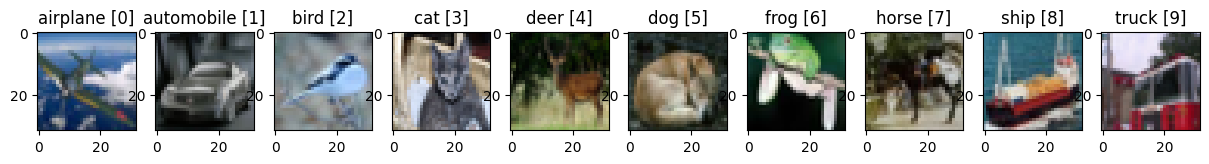

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i]+" "+np.str(y_train[rmd][0]))


X_train=((x_train / 255)-0.5)*2 # normalize the data into a range from -1 to 1
Y_train=tensorflow.keras.utils.to_categorical(y_train,10) # one-hot encoding

X_test=((x_test / 255)-0.5)*2   # normalize the data into a range from -1 to 1
Y_test=tensorflow.keras.utils.to_categorical(y_test,10) # one-hot encoding



In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


## Define and fit a CNN without dropout layers

In the next few cells you will define and train a CNN to classify the images into the 10 classes. You will use a network with 2 Convolution blocks followed by a Maxpooling layer. After the feature extraction part you will use 2 fully connected layers before classifying the image into one of the 10 classes. You can lookup the hyperparameters of the CNN in the cell below.

In [5]:
# here you define hyperparameter of the CNN
batch_size = 128
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)

#### Listing 8.4 Defining and training of a classification CNN with dropout layers

In [6]:
nb_classes = 10

# define CNN with 2 convolution blocks and 2 fully connected layers
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                        

In [8]:
history1=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)


Epoch 1/30
391/391 [==============================] - 15s 10ms/step - loss: 1.5158 - accuracy: 0.4550 - val_loss: 1.2048 - val_accuracy: 0.5662
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 1.0855 - accuracy: 0.6146 - val_loss: 1.0352 - val_accuracy: 0.6273
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 0.9242 - accuracy: 0.6747 - val_loss: 0.9079 - val_accuracy: 0.6843
Epoch 4/30
391/391 [==============================] - 3s 7ms/step - loss: 0.8053 - accuracy: 0.7191 - val_loss: 0.8599 - val_accuracy: 0.6991
Epoch 5/30
391/391 [==============================] - 3s 7ms/step - loss: 0.7276 - accuracy: 0.7438 - val_loss: 0.8144 - val_accuracy: 0.7213
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 0.6533 - accuracy: 0.7718 - val_loss: 0.8355 - val_accuracy: 0.7158
Epoch 7/30
391/391 [==============================] - 3s 7ms/step - loss: 0.5958 - accuracy: 0.7901 - val_loss: 0.8196 - val_accuracy: 0.7193
Epoc

## Define and fit a CNN with dropout layers in the fully connected part

In the next few cells you will define and train a CNN to classify the images into the 10 classes. You will use the same network with one small change. This time you add dropout layers after the fully connected layers, you will use a dropout rate of 0.5. This means that in trainig, half of the nodes in the fully conncted part are randomly deleted at each update step.

In [9]:
nb_classes = 10

# define CNN with 2 convolution blocks and 2 fully connected layers
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_8 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                      

In [11]:
history2=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)


Epoch 1/30
391/391 [==============================] - 6s 10ms/step - loss: 1.8621 - accuracy: 0.2992 - val_loss: 1.4516 - val_accuracy: 0.4792
Epoch 2/30
391/391 [==============================] - 3s 7ms/step - loss: 1.4954 - accuracy: 0.4512 - val_loss: 1.2656 - val_accuracy: 0.5582
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 1.3435 - accuracy: 0.5158 - val_loss: 1.2308 - val_accuracy: 0.5758
Epoch 4/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2268 - accuracy: 0.5674 - val_loss: 1.0413 - val_accuracy: 0.6364
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 1.1456 - accuracy: 0.5990 - val_loss: 1.0229 - val_accuracy: 0.6456
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 1.0894 - accuracy: 0.6203 - val_loss: 0.9573 - val_accuracy: 0.6670
Epoch 7/30
391/391 [==============================] - 3s 7ms/step - loss: 1.0362 - accuracy: 0.6416 - val_loss: 0.9315 - val_accuracy: 0.6733
Epoch

## Plotting the loss and accuracy curves
In the next few cells you plot the loss and accuray curves of the both models, the one without the dropout layers and the one with the dropout layers in the fully connected part.

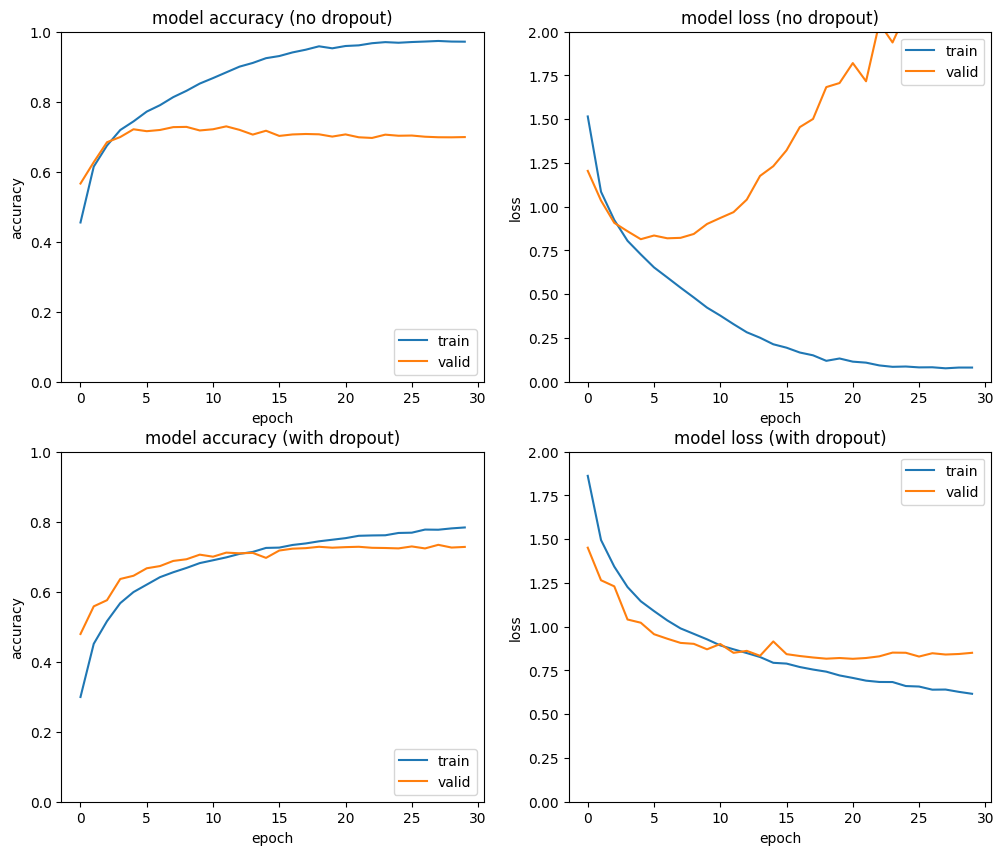

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (no dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])


plt.subplot(2,2,3)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (with dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (with dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
plt.show()

**As you can see the model with the dropout layers has a much nice learning curve. You can see a decreasing traning and validation loss and the curves are not very far apart. In the model without dropout you see overfitting; the validation loss starts to increase again after 7 epochs and the training loss is close to zero after 30 epochs. Note that in addition to the prevention of overfitting, you also even gain better classification accuracy ~73% compared to around ~71% without dropout.**